In [ ]:
# This code is used to receive more information on draws in the Premier-League between the 2019/20 and the 2023/24 season
# Here you can find the underlying database: https://www.kaggle.com/datasets/mexwell/football-data-from-transfermarkt

In [57]:
import pandas as pd
import numpy as np

# Read CSV files
appearances = pd.read_csv('appearances.csv')
games = pd.read_csv('games.csv')
competitions = pd.read_csv('competitions.csv')
club_games = pd.read_csv('club_games.csv')

# Merge the dataframes
df = pd.merge(appearances, games, on='game_id')

In [58]:
# Filter df for Premier-League (competition_id = 'GB1') games of the last 5 seasons
df2 = df[(df['competition_id_x'] == 'GB1') & (df['season'] > 2018)]

# Filter for draws
df3 = df2[df2['home_club_goals'] == df2['away_club_goals']]

df3

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
915740,3194819_108354,3194819,108354,873,873,2019-08-10,Jordan Ayew,GB1,0,0,...,Selhurst Park,25151.0,Jonathan Moss,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2,4-2-3-1,Crystal Palace Football Club,Everton Football Club,0:0,domestic_league
915741,3194819_118534,3194819,118534,29,29,2019-08-10,Michael Keane,GB1,0,0,...,Selhurst Park,25151.0,Jonathan Moss,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2,4-2-3-1,Crystal Palace Football Club,Everton Football Club,0:0,domestic_league
915742,3194819_126664,3194819,126664,29,405,2019-08-10,Lucas Digne,GB1,0,0,...,Selhurst Park,25151.0,Jonathan Moss,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2,4-2-3-1,Crystal Palace Football Club,Everton Football Club,0:0,domestic_league
915743,3194819_130164,3194819,130164,29,29,2019-08-10,Jordan Pickford,GB1,0,0,...,Selhurst Park,25151.0,Jonathan Moss,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2,4-2-3-1,Crystal Palace Football Club,Everton Football Club,0:0,domestic_league
915744,3194819_145988,3194819,145988,873,141,2019-08-10,Wilfried Zaha,GB1,0,0,...,Selhurst Park,25151.0,Jonathan Moss,https://www.transfermarkt.co.uk/crystal-palace...,4-4-2,4-2-3-1,Crystal Palace Football Club,Everton Football Club,0:0,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578456,4095442_534033,4095442,534033,31,31,2024-05-13,Alexis Mac Allister,GB1,0,0,...,Villa Park,42241.0,Simon Hooper,https://www.transfermarkt.co.uk/aston-villa_li...,4-2-3-1,4-3-3 Attacking,Aston Villa Football Club,Liverpool Football Club,3:3,domestic_league
1578457,4095442_546543,4095442,546543,31,31,2024-05-13,Darwin Núñez,GB1,0,0,...,Villa Park,42241.0,Simon Hooper,https://www.transfermarkt.co.uk/aston-villa_li...,4-2-3-1,4-3-3 Attacking,Aston Villa Football Club,Liverpool Football Club,3:3,domestic_league
1578458,4095442_565822,4095442,565822,31,31,2024-05-13,Harvey Elliott,GB1,1,0,...,Villa Park,42241.0,Simon Hooper,https://www.transfermarkt.co.uk/aston-villa_li...,4-2-3-1,4-3-3 Attacking,Aston Villa Football Club,Liverpool Football Club,3:3,domestic_league
1578459,4095442_632349,4095442,632349,31,31,2024-05-13,Jarell Quansah,GB1,0,0,...,Villa Park,42241.0,Simon Hooper,https://www.transfermarkt.co.uk/aston-villa_li...,4-2-3-1,4-3-3 Attacking,Aston Villa Football Club,Liverpool Football Club,3:3,domestic_league


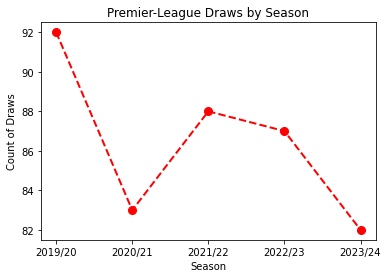

In [59]:
import matplotlib.pyplot as plt

# Group draws by season
draws_by_season = df3.groupby('season')['game_id'].nunique().reset_index(name='draw_count')

# Create a line plot
plt.plot(draws_by_season['season'], draws_by_season['draw_count'], color='red', linestyle='--', linewidth=2, marker='o', markersize=8, label='Quadratic')

seasons = ['2019/20', '2020/21', '2021/22', '2022/23', '2023/24']
plt.xticks(ticks = draws_by_season['season'], labels = seasons)

plt.title('Premier-League Draws by Season')
plt.xlabel('Season')
plt.ylabel('Count of Draws')

plt.show()

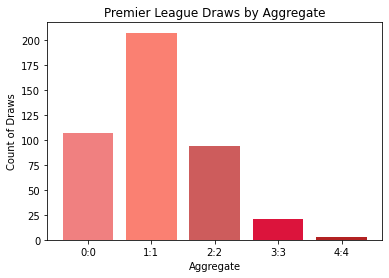

In [60]:
# Group draws by aggregate
draws_by_aggregate = df3.groupby('aggregate')['game_id'].nunique().reset_index(name='aggregate_count')

# Create a bar plot
plt.bar(draws_by_aggregate['aggregate'], draws_by_aggregate['aggregate_count'], color=['#F08080', '#FA8072', '#CD5C5C', '#DC143C', '#B22222'])

plt.title('Premier League Draws by Aggregate')
plt.xlabel('Aggregate')
plt.ylabel('Count of Draws')

plt.show()

In [61]:
# Group draws by goal scorers and count their games
draws_by_scorer = df3.groupby('player_name')['game_id'].nunique().reset_index(name='aggregate_goals')

games_played = df2.groupby('player_name')['game_id'].count().reset_index(name='games_played')

# Merge the two DataFrames on 'player_name'
result = pd.merge(draws_by_scorer, games_played, on='player_name')

result.sort_values(by='aggregate_goals', ascending = False)

,player_name,aggregate_goals,games_played
760,Pascal Groß,54,165
577,Lewis Dunk,52,167
259,Dwight McNeil,52,183
431,James Tarkowski,52,185
195,Dan Burn,51,161
...,...,...,...
856,Samuel Kalu,1,4
448,Jay Stansfield,1,3
149,Charlie Cresswell,1,5
105,Benson Manuel,1,8


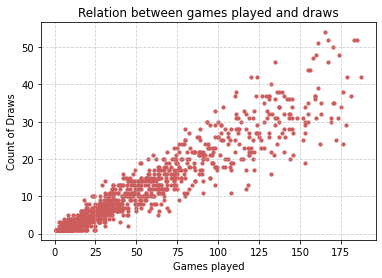

In [62]:
# Create a scatter plot

plt.scatter(result['games_played'], result['aggregate_goals'], s=10, c='#CD5C5C')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Games played')
plt.ylabel('Count of Draws')
plt.title('Relation between games played and draws')

plt.show()

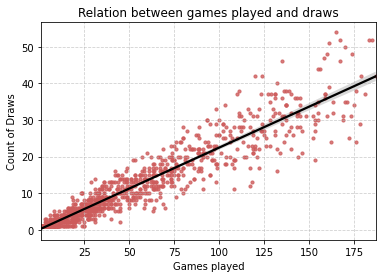

In [63]:
# Improve the plot by adding a  regression line

import seaborn as sns

sns.regplot(x=result['games_played'], y=result['aggregate_goals'], data=result, scatter_kws={'s': 10, 'color': '#CD5C5C'}, line_kws={'color': 'black'})
plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Games played')
plt.ylabel('Count of Draws')
plt.title('Relation between games played and draws')

plt.show()

In [123]:
# New Merge
df4 = pd.merge(games, club_games, on='game_id')

#Add total goals as substitute for aggregate column, which is text - need it as num
df4['total_goals'] = df4['home_club_goals'] + df4['away_club_goals']

# Once again filter for draws and season 2019/20-2023/24
df5 = df4[(df4['competition_id'] == 'GB1') & (df4['season'] > 2018)]
df6 = df5[df5['home_club_goals'] == df5['away_club_goals']]

df6

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,total_goals
4078,3219162,GB1,2019,37. Matchday,2020-07-22,985,379,1,1,3.0,...,1,3.0,Ole Gunnar Solskjaer,379,1,15.0,David Moyes,Home,0,2
4079,3219162,GB1,2019,37. Matchday,2020-07-22,985,379,1,1,3.0,...,1,15.0,David Moyes,985,1,3.0,Ole Gunnar Solskjaer,Away,0,2
4080,3219187,GB1,2019,26. Matchday,2020-02-14,543,1003,0,0,8.0,...,0,8.0,Nuno Espírito Santo,1003,0,3.0,Brendan Rodgers,Home,0,0
4081,3219187,GB1,2019,26. Matchday,2020-02-14,543,1003,0,0,8.0,...,0,3.0,Brendan Rodgers,543,0,8.0,Nuno Espírito Santo,Away,0,0
4082,3219201,GB1,2019,33. Matchday,2020-07-05,762,379,2,2,12.0,...,2,12.0,Steve Bruce,379,2,16.0,David Moyes,Home,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132469,3429793,GB1,2020,31. Matchday,2021-04-12,1237,29,0,0,15.0,...,0,8.0,Carlo Ancelotti,1237,0,15.0,Graham Potter,Away,0,0
135338,3429714,GB1,2020,23. Matchday,2021-02-06,1132,1237,1,1,17.0,...,1,17.0,Sean Dyche,1237,1,15.0,Graham Potter,Home,0,2
135339,3429714,GB1,2020,23. Matchday,2021-02-06,1132,1237,1,1,17.0,...,1,15.0,Graham Potter,1132,1,17.0,Sean Dyche,Away,0,2
136236,4095403,GB1,2023,33. Matchday,2024-04-13,1132,1237,1,1,19.0,...,1,19.0,Vincent Kompany,1237,1,11.0,Roberto De Zerbi,Home,0,2


In [129]:
# Check for correlation
df7 = df6[['total_goals', 'opponent_position']]

df7.corr()

,total_goals,opponent_position
total_goals,1.000000,-0.082137
opponent_position,-0.082137,1.000000


In [ ]:
# Interpretation: The worse the opponent (high position in table), the less goals happen in a draw
# Sense-Check: Bad teams tend to score less, meaning that it is reasonable that they often have 0:0 or 1:1 draws,
# while good teams score more and, therefore, take part in high goal-scoring draws (e.g., 3:3, 4:4)